  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6295 | train_acc: 0.6407 | test_loss: 0.5727 | test_acc: 0.7193
Epoch: 2 | train_loss: 0.4618 | train_acc: 0.7894 | test_loss: 0.4053 | test_acc: 0.8298
Epoch: 3 | train_loss: 0.3935 | train_acc: 0.8206 | test_loss: 0.3724 | test_acc: 0.8403
Epoch: 4 | train_loss: 0.3513 | train_acc: 0.8508 | test_loss: 0.3358 | test_acc: 0.8744
Epoch: 5 | train_loss: 0.2999 | train_acc: 0.8750 | test_loss: 0.2971 | test_acc: 0.8855
Epoch: 6 | train_loss: 0.2586 | train_acc: 0.8970 | test_loss: 0.2546 | test_acc: 0.8961
Epoch: 7 | train_loss: 0.2228 | train_acc: 0.9117 | test_loss: 0.2610 | test_acc: 0.8981
Epoch: 8 | train_loss: 0.2051 | train_acc: 0.9212 | test_loss: 0.3980 | test_acc: 0.8269
Epoch: 9 | train_loss: 0.1696 | train_acc: 0.9364 | test_loss: 0.2168 | test_acc: 0.9255
Epoch: 10 | train_loss: 0.1555 | train_acc: 0.9486 | test_loss: 0.2130 | test_acc: 0.9170
Epoch: 11 | train_loss: 0.1291 | train_acc: 0.9570 | test_loss: 0.1913 | test_acc: 0.9280
Epoch: 12 | train_l

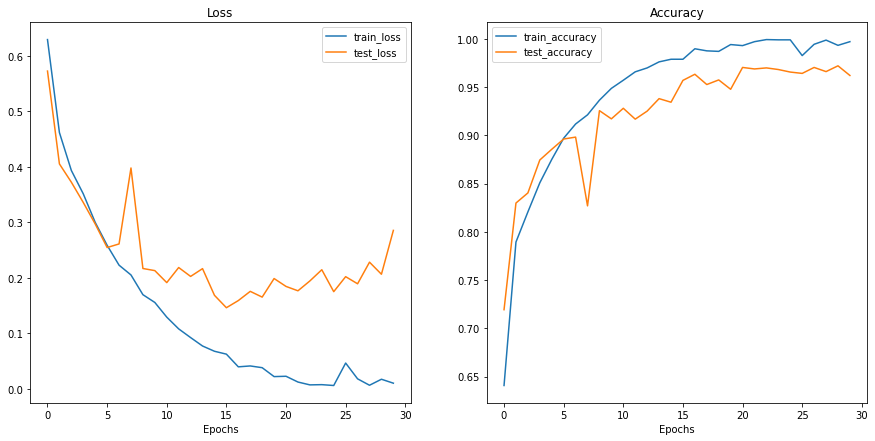

In [3]:
"""
Plot loss curves
"""

import os
import torch
import data_setup, engine, model_builder, utils

from torchvision import transforms

# Setup hyperparameters
NUM_EPOCHS = 30
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

# Setup directories
train_dir = "/Users/agustintumminello/Desktop/visual_brain/input/train"
test_dir = "/Users/agustintumminello/Desktop/visual_brain/input/test"

# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
    )

    # Create model with help from model_builder.py
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)).to(device)

    # Set loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Start training with help from engine.py
model_results = engine.train(model=model,
                             train_dataloader=train_dataloader,
                             test_dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             optimizer=optimizer,
                             epochs=NUM_EPOCHS,
                             device=device)

utils.plot_loss_curves(model_results)